In [13]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import tensorflow as tf
from glob import glob
import cv2
from imutils.video import VideoStream
from imutils import face_utils
import argparse
import imutils
import time
import dlib
from keras.preprocessing import image
import numba
import os
from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    face_files = np.array(data['filenames'])
    face_targets = np.array(data['target'])
    return face_files, face_targets

# load train, test, and validation datasets
human_files, human_targets = load_dataset('train_human/humans')
dog_files, dog_targets = load_dataset('train_human/dogs/')

# load list of dog names

human_names = [item[19:] for item in sorted(glob("train_human/humans/*"))]
dog_names = [item[21:] for item in sorted(glob("train_human/dogs/*"))]

# print statistics about the dataset
print('There are %s total face sub categories.' % str(len(human_names) + len(dog_names)))
print('There are %s total human face images.\n' % len(np.hstack([human_files, dog_files])))
print('There are %s human face images.' % len(human_files))
print('There are %s dog face images.' % len(dog_files))


There are 5882 total face sub categories.
There are 21584 total human face images.

There are 13233 human face images.
There are 8351 dog face images.


In [14]:
all_files = np.hstack([human_files, dog_files])
all_targets = np.hstack([human_targets, dog_targets+5749])
all_names = np.hstack([human_names, dog_names])
all_labels = np.hstack([np.ones(human_files.shape[0]), 
                        np.zeros(dog_files.shape[0])])
all_labels = np_utils.to_categorical(all_labels,num_classes=all_names.shape[0])

In [ ]:
import os
for root,dirs,files in os.walk(".", topdown=True):
    for name in files:
        print(os.path.join(root, name))

In [15]:
all_files = np.hstack([human_files, dog_files])
all_targets = np.hstack([human_targets,dog_targets])
all_names = np.hstack([human_names,dog_names])

In [53]:
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

def face_detector_box(img):
    imgbgr = img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        cv2.rectangle(imgbgr,(x,y),(x+w,y+h),(255,0,0),2)
    cv_rgb = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    return cv_rgb

def facedetector_dlib(img_path):
    detector = dlib.get_frontal_face_detector()
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray,0)
    return len(faces) > 0

def face_detector_box_dlib(img):
    detector = dlib.get_frontal_face_detector()
    imgbgr = img
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = detector(gray,0)
    for box in faces:
        (x,y,w,h) = box.left(), box.top(), box.right(), box.bottom()
        cv2.rectangle(imgbgr,(x,y),(w,h),(255,0,0),2)
    cv_rgb = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    return cv_rgb

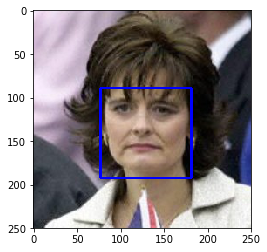

In [55]:
img = cv2.imread(all_files[0])
plt.imshow(face_detector_box_dlib(img))